<a href="https://colab.research.google.com/github/noahmott/ww1wordcloudnlp/blob/main/ww1wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import json


In [2]:
f=open('/content/drive/MyDrive/letters.json',)

In [4]:
data=json.load(f)

In [5]:
n=list(data.keys())

In [6]:
english=n[20:]

In [7]:
english

['na_uk_01',
 'na_uk_02',
 'na_uk_03',
 'na_uk_04',
 'na_uk_05',
 'na_uk_06',
 'na_uk_07',
 'na_uk_08',
 'na_uk_09',
 'na_uk_10',
 'na_uk_11',
 'na_uk_12',
 'na_uk_13',
 'na_uk_14',
 'na_uk_15',
 'na_uk_16',
 'na_uk_17',
 'na_uk_18',
 'na_uk_19',
 'na_uk_20',
 'na_uk_21',
 'na_uk_22',
 'na_uk_23',
 'na_uk_24',
 'na_uk_25',
 'na_uk_26',
 'na_uk_27',
 'na_uk_28',
 'na_uk_29',
 'na_uk_30',
 'na_uk_31',
 'na_uk_32',
 'na_uk_33',
 'na_uk_34',
 'na_uk_35',
 'na_uk_36',
 'na_uk_37',
 'na_uk_38',
 'na_uk_39',
 'na_uk_40']

In [8]:
m={k:v for k,v in data.items() if k in english}

In [9]:
m

{'na_uk_01': 'Dear Mr Welsh,\n\nWe were only out here a matter of a few hours before we went into the trenches; we were there for eight days and then came on to what is called a Rest Camp. I suppose it is called that to distinguish it from the trenches because the men are at work all day road and trench making and it comes under both rifle and artillery fire. We got here at 7 o’clock yesterday morning and were shelled at 9 o’clock.\n\nIn the trenches it was fairly bad, they are so narrow and smelly and one is being potted at and shelled all the time. A turn of eight days was really quite long enough because it is strenuous work and even when you do turn in for a rest you have to be ready to turn out at once on an alarm.\n\nThe country is really quite pretty and just like the hills and valleys of South Wales, but there are no brooks or rivers. It rains hard for a month each year usually about this time and then there is no more until the next rainy season. But although it is so glorious

In [ ]:
full_text=' '.join(x.lower() for x in m.values())

In [ ]:
full_text=full_text.replace('[^\w\s]', '')

In [ ]:
full_text

'dear mr welsh,\n\nwe were only out here a matter of a few hours before we went into the trenches; we were there for eight days and then came on to what is called a rest camp. i suppose it is called that to distinguish it from the trenches because the men are at work all day road and trench making and it comes under both rifle and artillery fire. we got here at 7 o’clock yesterday morning and were shelled at 9 o’clock.\n\nin the trenches it was fairly bad, they are so narrow and smelly and one is being potted at and shelled all the time. a turn of eight days was really quite long enough because it is strenuous work and even when you do turn in for a rest you have to be ready to turn out at once on an alarm.\n\nthe country is really quite pretty and just like the hills and valleys of south wales, but there are no brooks or rivers. it rains hard for a month each year usually about this time and then there is no more until the next rainy season. but although it is so gloriously sunny some

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import urllib
import requests
import pymongo
from bs4 import BeautifulSoup as bs1
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk import FreqDist
import seaborn as sns
from textblob import TextBlob, Word, Blobber
from nltk.stem import PorterStemmer
st = PorterStemmer()
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(10.7,6.27)})
from PIL import Image
import numpy as np
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'white'})
from textblob import TextBlob, Word, Blobber
import wordcloud
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
def clean(txt):
    txt = txt.replace("(<br/>)", "")
    txt = txt.replace('(<a).*(>).*(</a>)', '')
    txt = txt.replace('(&amp)', '')
    txt = txt.replace('(&gt)', '')
    txt = txt.replace('(&lt)', '')
    txt = txt.replace('(\xa0)', ' ')  
    return txt

In [ ]:
full_text=clean(full_text)

In [ ]:
full_text

'dear mr welsh,\n\nwe were only out here a matter of a few hours before we went into the trenches; we were there for eight days and then came on to what is called a rest camp. i suppose it is called that to distinguish it from the trenches because the men are at work all day road and trench making and it comes under both rifle and artillery fire. we got here at 7 o’clock yesterday morning and were shelled at 9 o’clock.\n\nin the trenches it was fairly bad, they are so narrow and smelly and one is being potted at and shelled all the time. a turn of eight days was really quite long enough because it is strenuous work and even when you do turn in for a rest you have to be ready to turn out at once on an alarm.\n\nthe country is really quite pretty and just like the hills and valleys of south wales, but there are no brooks or rivers. it rains hard for a month each year usually about this time and then there is no more until the next rainy season. but although it is so gloriously sunny some

In [ ]:
stop = stopwords.words('english')

In [ ]:
my_stop_words = set(stopwords.words('english') + list(ENGLISH_STOP_WORDS) + ['super', 'tell', 'went','got', 'lot', 'thing', 'say', 'come', 'sent', 'left', 'good', 'day', 'days', 'night', 'getting', 'mr', 'dear', 'right', 'ago','make', 'duper', 'forewarned', 'airy', 'youre', 'bit', 'yeasty', 'going', 'sodium','felt','place','burnt', 'like', 'really', 'best', 'amazing', 'social', 'house', 'definitely', 'awesome', 'castaways', 'greasy','came', 'guy', 'wasnt', 'theyd' 'got', 'dont','looked', 'know', 'hesitant', 'hard', 'sad', 'little', 'wouldnt', 'prices'])

In [ ]:
def setListOfcolor_func(word=None, font_size=None,  
                     position=None, orientation=None,  
                     font_path=None, random_state=None):  
    #define the list of set colors  
    color_list = ["#a68856", "#34a8c8", "#969c60", "#52aa91", "#a25a5c"]  

    #return a random color in the list  
    return np.random.choice(color_list)  

In [ ]:
font_path='/content/TypewriterRusticRNH-Regular.otf'

In [ ]:
mask=np.array(Image.open('/content/Capture.PNG'))

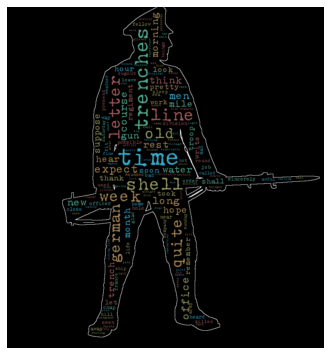

In [ ]:
wc = WordCloud(stopwords=my_stop_words,
                background_color="black",
               max_words=150, max_font_size=70,
               random_state=49, color_func=setListOfcolor_func, font_path=font_path,
                width=mask.shape[0], mask=mask,
               height=mask.shape[0], contour_color='white', contour_width=1)
wc.generate(full_text)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
wc.to_file('ww1.png')